In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [228]:
df = pd.read_csv("./dataset.csv")
df.head(20)

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,1,no,0,0,0,0.000000,0,1,0,0.58970,17,2,0,1,1,0,0,1,0.41030
1,2,no,0,0,0,0.000000,0,1,0,0.90081,17,2,0,1,1,0,0,1,0.09919
2,3,no,0,0,0,0.000000,0,1,0,0.89853,17,2,0,1,1,0,0,1,0.10147
3,4,no,0,0,0,0.000000,0,1,0,0.64069,17,2,0,1,1,0,0,1,0.35931
4,5,no,0,0,0,0.000000,0,1,0,0.59837,17,2,0,1,1,0,0,1,0.40163
5,6,no,2,1,0,0.833333,0,2,0,0.65767,4,7,2,1,1,2,1,3,0.34233
6,7,no,9,1,0,0.814815,0,2,9,0.66566,4,7,9,1,1,2,1,3,0.33434
7,8,no,8,1,0,0.958333,0,2,8,0.41222,4,2,8,1,1,2,1,3,0.58778
8,9,no,138,1,0,0.007246,0,1,12,0.99744,3,3,138,1,1,1,1,2,0.00256
9,10,no,18,1,0,0.777778,0,2,6,0.58019,4,2,18,1,1,2,1,3,0.41981


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   p       1048575 non-null  int64  
 1   target  1048575 non-null  object 
 2   f0      1048575 non-null  int64  
 3   f1      1048575 non-null  int64  
 4   f2      1048575 non-null  int64  
 5   f3      1048575 non-null  float64
 6   f4      1048575 non-null  int64  
 7   f5      1048575 non-null  int64  
 8   f6      1048575 non-null  int64  
 9   f7      1048575 non-null  float64
 10  f8      1048575 non-null  int64  
 11  f9      1048575 non-null  int64  
 12  f10     1048575 non-null  int64  
 13  f11     1048575 non-null  int64  
 14  f12     1048575 non-null  int64  
 15  f13     1048575 non-null  int64  
 16  f14     1048575 non-null  int64  
 17  f15     1048575 non-null  int64  
 18  f16     1048575 non-null  float64
dtypes: float64(3), int64(15), object(1)
memory usage: 152.0+ MB


In [230]:
len(df)

1048575

In [231]:
df = df.drop(columns=['p']).drop_duplicates()
len(df)

961515

In [232]:
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000,961515.000
mean,8.162,0.927,0.138,0.533,1.270,1.251,4.173,0.757,13.031,3.457,8.923,0.728,0.728,1.508,2.198,2.178,0.243
std,29.797,2.438,1.938,0.416,11.293,0.581,11.537,0.204,13.496,2.084,31.220,0.445,0.445,2.527,12.771,2.504,0.204
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.588,7.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,0.052
50%,0.000,1.000,0.000,0.640,0.000,1.000,0.000,0.800,10.000,2.000,1.000,1.000,1.000,2.000,1.000,2.000,0.200
75%,4.000,1.000,0.000,0.976,1.000,1.000,4.000,0.948,15.000,6.000,5.000,1.000,1.000,2.000,2.000,3.000,0.412
max,255.000,255.000,255.000,1.000,255.000,8.000,255.000,1.000,238.000,7.000,255.000,1.000,1.000,255.000,510.000,256.000,1.000


In [233]:
samples_cnt = df.groupby('target').count()['f0']
total_samples_cnt = samples_cnt.sum()

print(f'Marked, as \'no\': count = {samples_cnt["no"]}, percentage = {(samples_cnt["no"] * 100) / total_samples_cnt:.3f}%')
print(f'Marked, as \'yes\': count = {samples_cnt["yes"]}, percentage = {(samples_cnt["yes"] * 100) / total_samples_cnt:.3f}%')

Marked, as 'no': count = 944891, percentage = 98.271%
Marked, as 'yes': count = 16624, percentage = 1.729%


In [234]:
def get_f_names(input_df):
    return list(filter(lambda c: c[0] == 'f', input_df.columns))

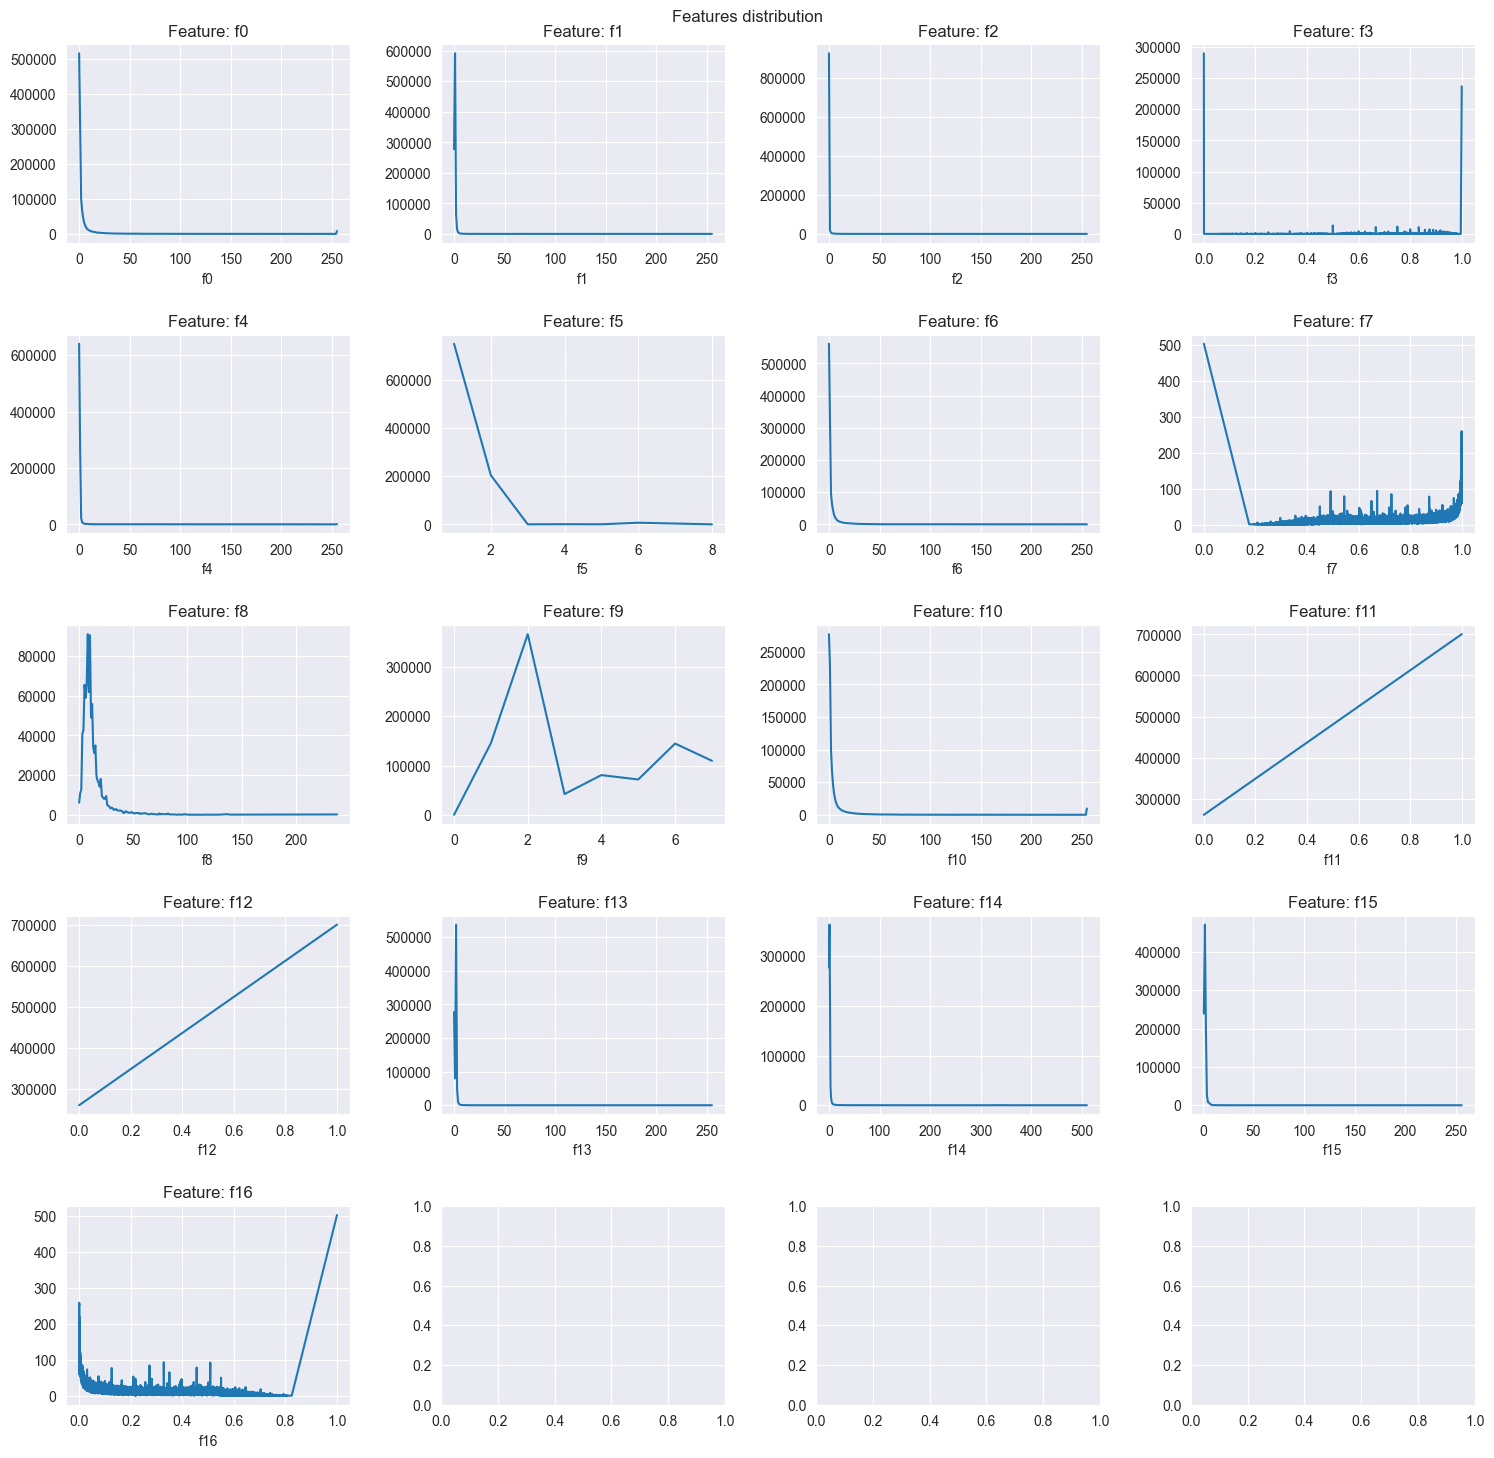

In [235]:
f_names = get_f_names(df)
plot_rows_count = 5
plot_columns_count = 4

fig, axes = plt.subplots(plot_rows_count, plot_columns_count)
fig.suptitle('Features distribution')
fig.tight_layout(pad=0.01)

for i in range(plot_rows_count):
    for j in range(plot_columns_count):
        cur_f_num = i * plot_columns_count + j

        if cur_f_num + 1 > len(f_names):
            break

        f_name = f_names[i * plot_columns_count + j]
        axes[i, j].title.set_text(f'Feature: {f_name}')
        df.groupby(f_name).count()['target'].plot(ax=axes[i, j], figsize=(15, 15))

array([[<Axes: title={'center': 'f5'}>, <Axes: title={'center': 'f9'}>,
        <Axes: title={'center': 'f11'}>, <Axes: title={'center': 'f12'}>]],
      dtype=object)

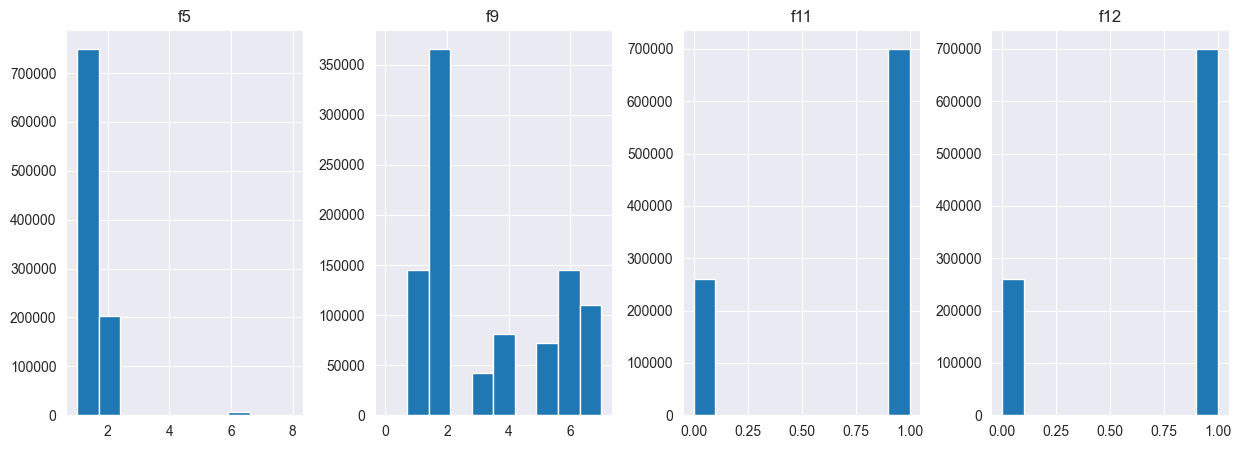

In [236]:
nominal_f_candidates_names = ['f5', 'f9', 'f11', 'f12']

df.hist(column=nominal_f_candidates_names, layout=(1, len(nominal_f_candidates_names)), figsize=(15, 5))

In [237]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

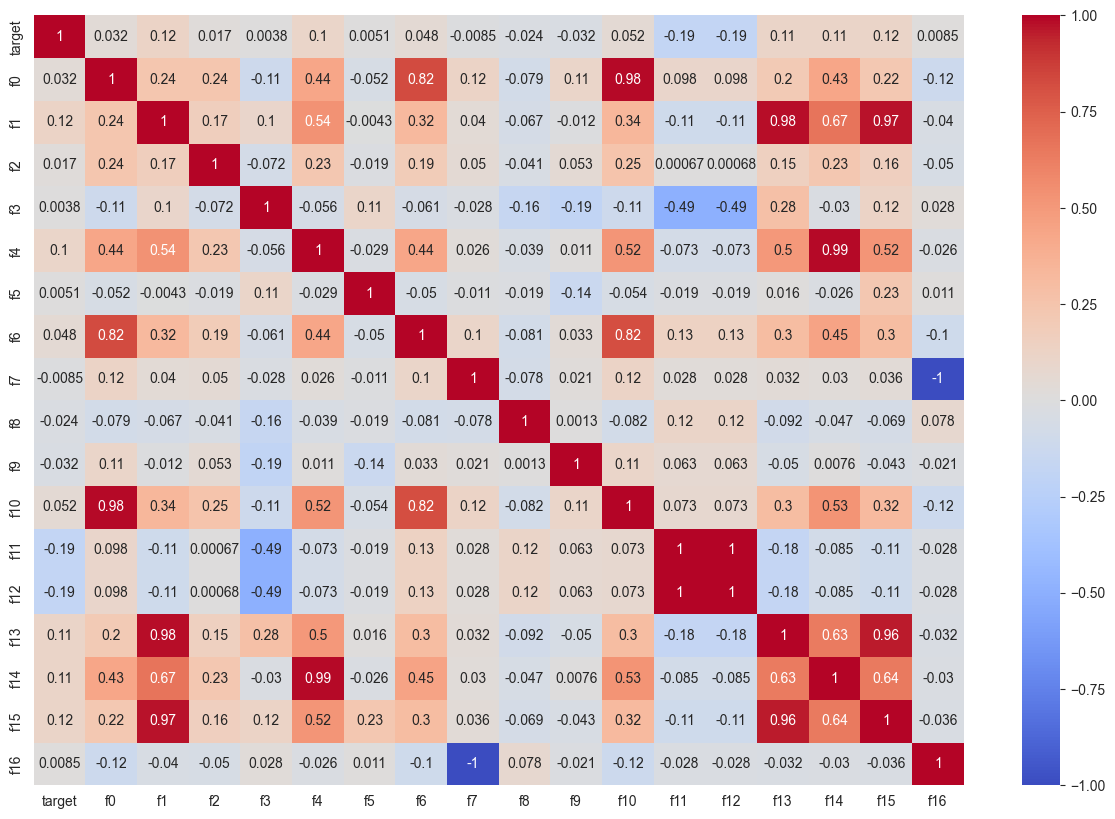

In [238]:
def plot_corr_matrix(input_df):
    corr_matrix_rows = list(filter(lambda c: c != 'p', df.columns))
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(input_df[corr_matrix_rows].corr(), annot=True, cmap='coolwarm', ax=ax)

plot_corr_matrix(df)

In [239]:
features_with_high_corr = [
    'f6',
    'f10',
    'f12',
    'f13',
    'f14',
    'f15',
    'f16'
]

df = df.drop(features_with_high_corr, axis=1)

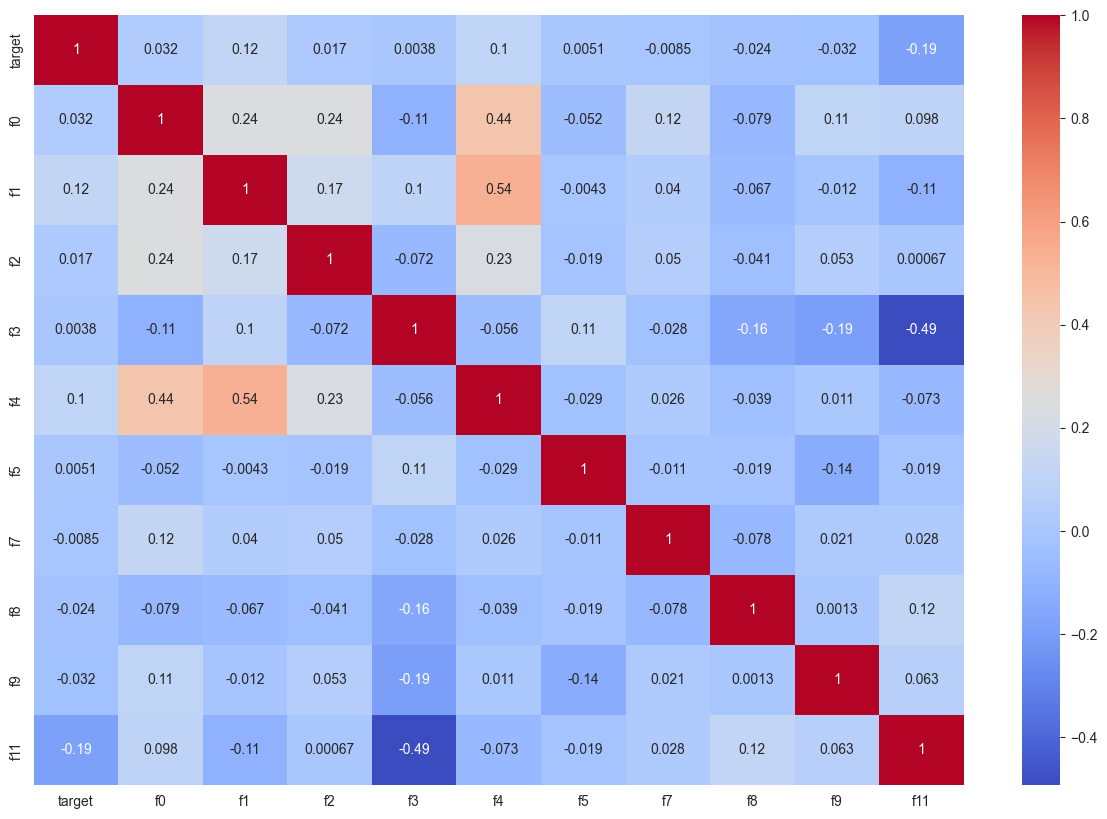

In [240]:
plot_corr_matrix(df)

In [241]:
# df = pd.get_dummies(df, columns=['f5', 'f9'], dtype=int)

In [242]:
X = df[get_f_names(df)].to_numpy()
Y = df['target'].to_numpy()
print(f"X.shape={X.shape}")
print(f"Y.shape={Y.shape}")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42, stratify=Y)
print(f"X_test.shape={X_test.shape}")
print(f"Y_test.shape={Y_test.shape}")
print(f"Test dataset: marked as 'no': {np.count_nonzero(Y_test == 0) * 100 / len(Y_test):.3f} %")
print(f"Test dataset: marked as 'yes': {np.count_nonzero(Y_test == 1) * 100 / len(Y_test):.3f} %")

X.shape=(961515, 10)
Y.shape=(961515,)
X_test.shape=(192303, 10)
Y_test.shape=(192303,)
Test dataset: marked as 'no': 98.271 %
Test dataset: marked as 'yes': 1.729 %


In [243]:
# param_grid = {
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
#
# model_for_grid = DecisionTreeClassifier()
# grid = GridSearchCV(
#     estimator=model_for_grid,
#     param_grid=param_grid,
#     cv=5,
#     verbose=4,
#     scoring='precision'
# )
# grid.fit(X_train, Y_train)

In [244]:
# model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=200)
model.fit(X_train, Y_train)
model

LogisticRegression(class_weight='balanced', max_iter=200)

In [245]:
Y_predict = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_predict)
conf_matrix

array([[178942,  10036],
       [   412,   2913]])

In [246]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    188978
           1       0.22      0.88      0.36      3325

    accuracy                           0.95    192303
   macro avg       0.61      0.91      0.66    192303
weighted avg       0.98      0.95      0.96    192303

